<a href="https://colab.research.google.com/github/CaseySobon/Variational-autoencoder-VAE/blob/main/VAE_reconstructing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import numpy as np
import cv2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(50000, 1024)
(10000, 1024)


In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

In [ ]:

input_dim = x_train.shape[1]
encoding_dim = 64

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Encoder Layers
#autoencoder.add(Dense(16* encoding_dim, input_shape=(input_dim,), activation='relu'))
#autoencoder.add(Dense(8 * encoding_dim, activation='relu'))
#autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
#autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
#autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
#autoencoder.add(Dense(8 * encoding_dim, activation='relu'))
#autoencoder.add(Dense(16 * encoding_dim, activation='relu'))

#autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

Compression factor: 16.0
Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 1024)]            0         
                                                                 
 dense_68 (Dense)            (None, 32)                32800     
                                                                 
 dense_69 (Dense)            (None, 1024)              33792     
                                                                 
Total params: 66,592
Trainable params: 66,592
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder_layer4 = autoencoder.layers[3]

encoder = Model(input_img, encoder_layer4(encoder_layer3(encoder_layer2(encoder_layer1(input_img)))))
#encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_3').output)
encoder.summary()

ValueError: ignored

In [ ]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1=autoencoder.layers[-4]
decoder_layer2=autoencoder.layers[-3]
decoder_layer3=autoencoder.layers[-2]
decoder_layer4=autoencoder.layers[-1]

decoder=Model(encoded_input, decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))))
decoder.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 64)]              0         
                                                                 
 dense_62 (Dense)            (None, 256)               16640     
                                                                 
 dense_63 (Dense)            (None, 512)               131584    
                                                                 
 dense_64 (Dense)            (None, 1024)              525312    
                                                                 
 dense_65 (Dense)            (None, 1024)              1049600   
                                                                 
Total params: 1,723,136
Trainable params: 1,723,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def decoder(encoded_input):
    h=Dense(inter_encoding_dim, activation='relu')(encoded_input)
    decoded= Dense(input_dim, activation='sigmoid')(h)
    return decoded

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
196/196 [==============================] - 4s 18ms/step - loss: 0.6591 - val_loss: 0.6378
Epoch 2/20
196/196 [==============================] - 3s 16ms/step - loss: 0.6301 - val_loss: 0.6244
Epoch 3/20
196/196 [==============================] - 3s 17ms/step - loss: 0.6190 - val_loss: 0.6164
Epoch 4/20
196/196 [==============================] - 3s 16ms/step - loss: 0.6116 - val_loss: 0.6094
Epoch 5/20
196/196 [==============================] - 3s 15ms/step - loss: 0.6064 - val_loss: 0.6058
Epoch 6/20
196/196 [==============================] - 3s 15ms/step - loss: 0.6037 - val_loss: 0.6042
Epoch 7/20
196/196 [==============================] - 3s 17ms/step - loss: 0.6026 - val_loss: 0.6035
Epoch 8/20
196/196 [==============================] - 3s 16ms/step - loss: 0.6021 - val_loss: 0.6034
Epoch 9/20
196/196 [==============================] - 3s 16ms/step - loss: 0.6019 - val_loss: 0.6029
Epoch 10/20
196/196 [==============================] - 3s 16ms/step - loss: 0.6019 - val_lo

313/313 [==============================] - 1s 2ms/step


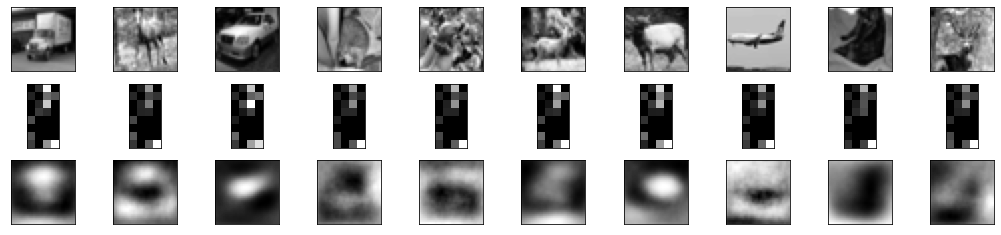

In [ ]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test [image_idx].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()